<H1><font color = 'green'>Investment Analysis Assignment</font></H1>
<H3> @author: Jesal P. </H3>

***

<H3> >> Importing required Libraries </H3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<H2>Checkpoint 1: Data Cleaning 1</H2>
<H3>>> Loading the <font color='red'>companies</font> and <font color='blue'>rounds2 </font> data into <font color='red'>companies</font> and <font color='blue'>rounds2 </font>dataframes respectively.</H3>

In [2]:
companies = pd.read_csv("D:/Disc_von_Wolke/GoogleDrive/UpGrad_ML_AI_coursebook/Submission_Documents/SparkFund_Investment/Downloads_file_Investment_Analysis/companies.txt", encoding="ISO-8859-1",sep='\t')

rounds2 = pd.read_csv("D:/Disc_von_Wolke/GoogleDrive/UpGrad_ML_AI_coursebook/Submission_Documents/SparkFund_Investment/Downloads_file_Investment_Analysis/rounds2.csv",encoding="ISO-8859-1")

# companies.describe()
# rounds2.info()

In [3]:
# Droping columns from companies that are not useful for this analysis
companies = companies.drop(['homepage_url','status','state_code','region','city','founded_at'], axis = 1)
#companies.head()

# Droping columns from rounds2 that are not useful for this analysis
rounds2 = rounds2.drop(['funding_round_code','funded_at'],axis=1)

<H3>>> Renaming column name <font color='red'>"company_permalink"</font> of <font color='blue'>rounds2</font> to <font color='red'>"permalink"</font> for merging.</H3>

In [4]:
rounds2 = rounds2.rename(columns = {"company_permalink":"permalink"}) 

<H3>>> Unique Companies in <font color='blue'>rounds2</font></H3>

In [5]:
rounds2['permalink'] = rounds2['permalink'].str.lower()
unique_company_rounds2 = len(rounds2['permalink'].unique())
print("> {} unique companies are present in rounds2.".format(unique_company_rounds2))

> 66370 unique companies are present in rounds2.


<H3>>> Unique Companies in <font color='red'>companies</font></H3>

In [6]:
companies['permalink'] = companies['permalink'].str.lower()
unique_company_companies = len(companies['permalink'].unique())
print("> {} unique companies are present in companies.".format(unique_company_companies))

> 66368 unique companies are present in companies.


<H3>>> Companies of <font color='blue'>rounds2</font> in Companies of<font color='red'>companies</font></H3>

In [7]:
r2_in_cmps = rounds2['permalink'].isin(companies['permalink']).value_counts()
r2_in_cmps

True     114942
False         7
Name: permalink, dtype: int64

In [8]:
# import chardet

# rawdata = open('D:/Disc_von_Wolke/GoogleDrive/UpGrad_ML_AI_coursebook/Submission_Documents/SparkFund_Investment/Downloads_file_Investment_Analysis/rounds2.csv','rb').read()
# result = chardet.detect(rawdata)
# charenc = result['encoding']
# print(charenc)

In [9]:
# print(result)

<H3>>> Merge the two data frames so that all variables (columns) in the <font color='red'>companies</font> frame are added to the <font color='blue'>rounds2</font> data frame. Name the merged frame <font color ='magenta'>master_frame</font>. </H3>

In [10]:
master_frame = pd.merge(rounds2,companies,how ='inner',on="permalink")

# filling NA values with 0 ; but the spread of data did'nt made any difference
# master_frame["raised_amount_usd"] = master_frame["raised_amount_usd"].fillna(0) #replacing nan values with 0
# boxplot = master_frame.boxplot(column=['raised_amount_usd'])
master_frame.head(5)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,0-6.com,Curated Web,CHN


***
<H2> Checkpoint 2: Funding Type Analysis </H2>
<H3>>> Calculating the most <font color='red'>representative value</font> of the investment amount for<br> each of the four funding types
    <font color='blue'>(venture, angel, seed, and private equity) </font> </H3>

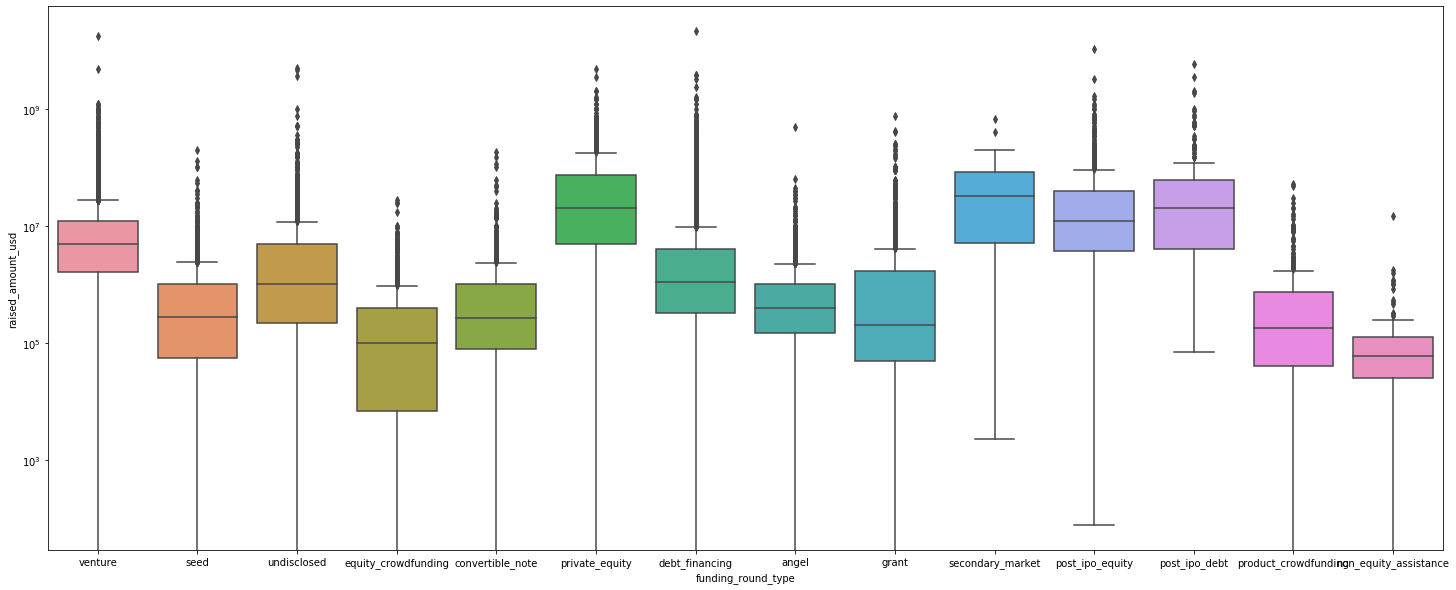

In [43]:
import seaborn as sns
fig3,axes3 = plt.subplots(figsize=(25,10))
sns.boxplot(x='funding_round_type',y ='raised_amount_usd',data = master_frame)
plt.yscale('log')
plt.show()

In [12]:
sel_fund_round_types = ["venture", "angel","seed","private_equity"] # List of chosen Investment Types

# Creating a copy of master frame 
master_frame_cpy = master_frame.groupby(['funding_round_type'])
FTA_df = pd.DataFrame(master_frame_cpy['raised_amount_usd'].sum())
FTA_df['mean']= pd.DataFrame(master_frame_cpy['raised_amount_usd'].mean())
FTA_df.columns=['sum','mean']
FTA_df

,sum,mean
funding_round_type,,
angel,4.659255e+09,9.586945e+05
convertible_note,2.103126e+09,1.453439e+06
debt_financing,1.138848e+11,1.704353e+07
equity_crowdfunding,6.611162e+08,5.383682e+05
grant,9.134424e+09,4.300576e+06
non_equity_assistance,3.001782e+07,4.112031e+05
post_ipo_debt,2.564309e+10,1.687046e+08
post_ipo_equity,5.161061e+10,8.218249e+07
private_equity,1.419254e+11,7.330859e+07


<H3> >> Checking if the investment type has <font color='blue'>average investment</font> amount between <font color ='green'>5 to 15 million USD</font> </H3>

In [13]:
# Creating lit of values for the condition inv_amt_range = [lower value limit ,upper value limit] 
inv_amt_range = [5E6,15E6] # Here it is 5-15 M USD -> 5E6 to 15E6

# Checking the condition of investment amount is between investment amount range
FTA_df['inrange'] = FTA_df['mean'].apply(lambda x:x >= inv_amt_range[0] and x <= inv_amt_range[1])

<H3> >> Filtering the data so it only contains the chosen investment types. <font color ='brown'>FTA_df = fund type analysis dataframe </font></H3>

In [14]:
FTA_df = FTA_df.loc[sel_fund_round_types]
selected_FT = FTA_df.index[FTA_df['inrange']== True] # Getting Fund Type which satisfies condition 5-15 M USD
FTA_df

,sum,mean,inrange
funding_round_type,,,
venture,5.901262e+11,1.174895e+07,True
angel,4.659255e+09,9.586945e+05,False
seed,1.698824e+10,7.197796e+05,False
private_equity,1.419254e+11,7.330859e+07,False


***

<H2> Checkpoint 3: Country Analysis </H2>
<H3>>> The <font color='red'>top nine countries</font> which have received the highest total funding (across ALL sectors for the chosen investment type : <font color ='blue'>Venture</font>)</H3>

<H3> >> importing csv file containing Counties with <font color ='blue'>English as Official Language</font></H3>

In [15]:
country_eng_df = pd.read_csv("D:/Disc_von_Wolke/GoogleDrive/UpGrad_ML_AI_coursebook/Submission_Documents/SparkFund_Investment/Downloads_file_Investment_Analysis/country_list_english.csv")

<H3>>> Filtering out <font color='red'>top nine countries</font> countries </H3> 
<h4>>>> Having <font color ='blue'>English as Official Language</font> <br> >>> Total amount of investments of funding type : <font color ='blue'>Venture</font></H4>

In [16]:
top9 = master_frame.loc[(master_frame['funding_round_type']=="venture")]
top9 = top9.loc[top9['country_code'].isin(country_eng_df['country_code'])]
top9 = pd.DataFrame(top9.groupby(['country_code'])['raised_amount_usd'].sum()).sort_values(by=['raised_amount_usd'],ascending=False)
top3_countries = list(top9.head(3).index)
top9.head(9)

,raised_amount_usd
country_code,
USA,4.225108e+11
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
ISR,6.907515e+09
SGP,2.793918e+09
IRL,1.676131e+09
AUS,1.322935e+09
MYS,8.830588e+08


***
<H2> Checkpoint 4: Sector Analysis 1</H2>
<H3>>> Extracting the <font color = 'blue'>primary sector</font> of each category list from the category_list column</H3>

In [17]:
master_frame['primary_sector'] = companies['category_list'].str.split('|').str[0]
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,IND,Media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA,Application Platforms
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA,Apps
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,Curated Web
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,0-6.com,Curated Web,CHN,Software


<H3>>> Mapping each <font color = 'blue'>primary sector</font> to one of the <font color = 'red'>eight main sector</font>.</H3>

In [18]:
mapping = pd.read_csv("D:/Disc_von_Wolke/GoogleDrive/UpGrad_ML_AI_coursebook/Submission_Documents/SparkFund_Investment/Downloads_file_Investment_Analysis/mapping.csv")

mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =list(mapping.columns[1:]))  
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping = mapping.dropna() 
mapping.head(100)

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
2226,Creative Industries,Entertainment
2260,Digital Entertainment,Entertainment
2261,Digital Media,Entertainment
2262,Digital Rights Ma0gement,Entertainment


<H3>>> A merged data frame with each <font color = 'blue'>primary sector</font> mapped to its <font color = 'red'>main sector</font> </H3>

In [19]:
master_2 = pd.merge(master_frame,mapping,how ='inner',on="category_list")
master_2.head(5)

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,IND,Media,Entertainment
1,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.0,All Def Digital,Media,USA,NaN,Entertainment
2,/organization/anthill-magazine,/funding-round/52128cd405b88f36a85d6cded8359f1c,seed,600000.0,Anthill Magazine,Media,AUS,Real Estate,Entertainment
3,/organization/attractive-black-singles-llc,/funding-round/231691541eddf75cf54d13a88370dd59,equity_crowdfunding,NaN,Attractive Black Singles LLC,Media,USA,Transportation,Entertainment
4,/organization/basel-switzerland,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,13439178.0,The Speedel Group,Media,CHE,Hardware + Software,Entertainment


In [44]:
master_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48883 entries, 0 to 48882
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                48883 non-null  object 
 1   funding_round_permalink  48883 non-null  object 
 2   funding_round_type       48883 non-null  object 
 3   raised_amount_usd        41559 non-null  float64
 4   name                     48882 non-null  object 
 5   category_list            48883 non-null  object 
 6   country_code             46367 non-null  object 
 7   primary_sector           27214 non-null  object 
 8   main_sector              48883 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.7+ MB


<H2> Checkpoint 5: Sector Analysis 2 </H2>
<H3>>> Defining the conditions:</H3>
<H4>>>>The funding type <font color ='blue'>Venture</font>.<br>
    >>>The range of funding preferred by Spark Funds is <font color ='green'>5 to 15 million USD</font>.</H4>

In [20]:
cond1 = (master_2['funding_round_type']== selected_FT[0])
cond2 = (master_2['raised_amount_usd'].apply(lambda x:x >= inv_amt_range[0] and x <= inv_amt_range[1]))

<H3> >> Creating three separate data frames <font color ='red'>D1, D2 and D3 </font>for each of the three countries containing the observations of funding type <font color='blue'>Ventue</font> falling within the <font color ='green'>5-15 million USD </font>range.</H3>

In [21]:
# Country 1(USA) with Official Language = English
D1 = master_2.loc[(master_2['country_code']==top3_countries[0]) & cond1 & cond2]

# Country 2(GBR) with Official Language = English
D2 = master_2.loc[(master_2['country_code']==top3_countries[1]) & cond1 & cond2]

# Country 3(IND) with Official Language = English
D3 = master_2.loc[(master_2['country_code']==top3_countries[2]) & cond1 & cond2]

<H3>>> Total number of investments (count).<br>
    >> Total amount of investment (USD)</H3>

In [22]:
# D1 = USA
D1_amount = D1.groupby(['main_sector'])['raised_amount_usd'].sum()
D1_count = D1.groupby(['main_sector'])['permalink'].count()

# D2 = GBR
D2_amount = D2.groupby(['main_sector'])['raised_amount_usd'].sum()
D2_count = D2.groupby(['main_sector'])['permalink'].count()

# D3 = IND
D3_amount = D3.groupby(['main_sector'])['raised_amount_usd'].sum()
D3_count = D3.groupby(['main_sector'])['permalink'].count()


<H3> >> Merging <font color='blue'>amount</font> and <font color='red'>count </font>Dataframe to main <font color='green'>Countries</font> Dataframe </H3>

<h4> # this dataframes are the final countries dataframes D1, D2 and D3</h4>

In [23]:
# merged amount and counts to D1 (USA) 
# top 3 sectors as per number of investment
D_ca1 = pd.merge(D1_amount,D1_count,on = 'main_sector',how='inner').sort_values(by='permalink',ascending=False).rename(columns = {'permalink':'no. of invest'})
D1 = pd.merge(D1,D_ca1,how='inner',on='main_sector')
D1.rename(columns = {'permalink_y':'counts','permalink_x':'permalink','raised_amount_usd_x':'raised_amount_usd','raised_amount_usd_y':'sum_amount'}, inplace = True)
D_ca1.head(3)

,raised_amount_usd,no. of invest
main_sector,,
Others,1.849231e+10,2069
Cleantech / Semiconductors,1.594099e+10,1737
Health,5.405750e+09,601


In [24]:
# merged amount and counts to D1 (GBR) 
# top 3 sectors as per number of investment
D_ca2 = pd.merge(D2_amount,D2_count,on = 'main_sector',how='inner').sort_values(by='permalink',ascending=False).rename(columns = {'permalink':'no. of invest'})
D2 = pd.merge(D2,D_ca2,on='main_sector',how='inner')
D2.rename(columns = {'permalink_y':'counts','permalink_x':'permalink','raised_amount_usd_x':'raised_amount_usd','raised_amount_usd_y':'sum_amount'}, inplace = True) 
D_ca2.head(3)

,raised_amount_usd,no. of invest
main_sector,,
Cleantech / Semiconductors,942829246.0,107
Others,931205523.0,106
"News, Search and Messaging",274140008.0,31


In [25]:
# merged amount and counts to D1 (GBR) 
# top 3 sectors as per number of investment 
D_ca3 = pd.merge(D3_amount,D3_count,on = 'main_sector',how='inner').sort_values(by='permalink',ascending=False).rename(columns = {'permalink':'no. of invest'})
D3= pd.merge(D3,D_ca3,on='main_sector',how='inner')
D3.rename(columns = {'permalink_y':'counts','permalink_x':'permalink','raised_amount_usd_x':'raised_amount_usd','raised_amount_usd_y':'sum_amount'}, inplace = True) 
D_ca3.head(3)

,raised_amount_usd,no. of invest
main_sector,,
Others,675169507.0,74
"News, Search and Messaging",267118770.0,31
Entertainment,156150000.0,19


<H3>>> Finding <font color='red'>Top 3 companies </font> based on <font color='red'> Top 3 Sectors </font> in individual <font color ='green'>Countries</font></H3>

In [26]:
# Creating list of Top-3 sectors for each country
sectors_D1 = list(D_ca1.head(3).index) #USA
sectors_D2 = list(D_ca2.head(3).index) #GBR
sectors_D3 = list(D_ca3.head(3).index) #IND

list([sectors_D1,sectors_D2,sectors_D3])

[['Others', 'Cleantech / Semiconductors', 'Health'],
 ['Cleantech / Semiconductors', 'Others', 'News, Search and Messaging'],
 ['Others', 'News, Search and Messaging', 'Entertainment']]

<H3> >> <font color='red'>Top 3 companies </font> based on <font color='red'> Top 3 Sectors </font> of <font color='green'> Country-1 </font></H3>

In [27]:
D1_top_company = D1 # duplicating dataframe to assure no change in main frame D1

# Top Sector Top Company
Top_Sector = D1_top_company.loc[D1_top_company['main_sector']==(sectors_D1[0])]
Top_Sector = pd.DataFrame(Top_Sector.groupby(['name'])['raised_amount_usd'].sum())
Top_Sector.rename(columns={'raised_amount_usd':sectors_D1[0]},inplace=True)
Top_Sector = Top_Sector.sort_values(by=[sectors_D1[0]],ascending=False).head(1)

# Second Sector Top Company
Second_Sector = D1_top_company.loc[D1_top_company['main_sector']==(sectors_D1[1])]
Second_Sector = pd.DataFrame(Second_Sector.groupby(['name'])['raised_amount_usd'].sum())
Second_Sector.rename(columns={'raised_amount_usd':sectors_D1[1]},inplace=True)
Second_Sector = Second_Sector.sort_values(by=[sectors_D1[1]],ascending=False).head(1)

# Third Sector Top Company
Third_Sector = D1_top_company.loc[D1_top_company['main_sector']==(sectors_D1[2])]
Third_Sector = pd.DataFrame(Third_Sector.groupby(['name'])['raised_amount_usd'].sum())
Third_Sector.rename(columns={'raised_amount_usd':sectors_D1[2]},inplace=True)
Third_Sector = Third_Sector.sort_values(by=[sectors_D1[2]],ascending=False).head(1)

# Dataframe consisting of Top-3 Companies of Top-3 Sectors of Country-1
D1_Table_5_df = pd.concat([Top_Sector,Second_Sector,Third_Sector])

D1_Table_5_df # values in each column is the total investment amount (USD) invested in each company.

,Others,Cleantech / Semiconductors,Health
name,,,
Virtustream,64300000.0,NaN,NaN
Tigo Energy,NaN,68739496.0,NaN
EndoGastric Solutions,NaN,NaN,67896724.0


<H3> >> <font color='red'>Top 3 companies </font> based on <font color='red'> Top 3 Sectors </font> of <font color='green'> Country-2 </font></H3>

In [28]:
D2_top_company = D2 # duplicating dataframe to assure no change in main frame D2

# Top Sector Top Company
Top_Sector = D2_top_company.loc[D2_top_company['main_sector']==(sectors_D2[0])]
Top_Sector = pd.DataFrame(Top_Sector.groupby(['name'])['raised_amount_usd'].sum())
Top_Sector.rename(columns={'raised_amount_usd':sectors_D2[0]},inplace=True)
Top_Sector = Top_Sector.sort_values(by=[sectors_D2[0]],ascending=False).head(1)

# Second Sector Top Company
Second_Sector = D2_top_company.loc[D2_top_company['main_sector']==(sectors_D2[1])]
Second_Sector = pd.DataFrame(Second_Sector.groupby(['name'])['raised_amount_usd'].sum())
Second_Sector.rename(columns={'raised_amount_usd':sectors_D2[1]},inplace=True)
Second_Sector = Second_Sector.sort_values(by=[sectors_D2[1]],ascending=False).head(1)

# Third Sector Top Company
Third_Sector = D2_top_company.loc[D2_top_company['main_sector']==(sectors_D2[2])]
Third_Sector = pd.DataFrame(Third_Sector.groupby(['name'])['raised_amount_usd'].sum())
Third_Sector.rename(columns={'raised_amount_usd':sectors_D2[2]},inplace=True)
Third_Sector = Third_Sector.sort_values(by=[sectors_D2[2]],ascending=False).head(1)

# Dataframe consisting of Top-3 Companies of Top-3 Sectors of Country-1
D2_Table_5_df = pd.concat([Top_Sector,Second_Sector,Third_Sector])

D2_Table_5_df # values in each column is the total investment amount (USD) invested in each company.

,Cleantech / Semiconductors,Others,"News, Search and Messaging"
name,,,
EUSA Pharma,35600000.0,NaN,NaN
Electric Cloud,NaN,37000000.0,NaN
Ubiquisys,NaN,NaN,37000000.0


<H3> >> <font color='red'>Top 3 companies </font> based on <font color='red'> Top 3 Sectors </font> of <font color='green'> Country-3 </font></H3>

In [29]:
D3_top_company = D3 # duplicating dataframe to assure no change in main frame D3

# Top Sector Top Company
Top_Sector = D3_top_company.loc[D3_top_company['main_sector']==(sectors_D3[0])]
Top_Sector = pd.DataFrame(Top_Sector.groupby(['name'])['raised_amount_usd'].sum())
Top_Sector.rename(columns={'raised_amount_usd':sectors_D3[0]},inplace=True)
Top_Sector = Top_Sector.sort_values(by=[sectors_D3[0]],ascending=False).head(1)

# Second Sector Top Company
Second_Sector = D3_top_company.loc[D3_top_company['main_sector']==(sectors_D3[1])]
Second_Sector = pd.DataFrame(Second_Sector.groupby(['name'])['raised_amount_usd'].sum())
Second_Sector.rename(columns={'raised_amount_usd':sectors_D3[1]},inplace=True)
Second_Sector = Second_Sector.sort_values(by=[sectors_D3[1]],ascending=False).head(1)
Second_Sector.head(100)

# Third Sector Top Company
Third_Sector = D3_top_company.loc[D3_top_company['main_sector']==(sectors_D3[2])]
Third_Sector = pd.DataFrame(Third_Sector.groupby(['name'])['raised_amount_usd'].sum())
Third_Sector.rename(columns={'raised_amount_usd':sectors_D3[2]},inplace=True)
Third_Sector = Third_Sector.sort_values(by=[sectors_D3[2]],ascending=False).head(1)

# Dataframe consisting of Top-3 Companies of Top-3 Sectors of Country-1
D3_Table_5_df = pd.concat([Top_Sector,Second_Sector,Third_Sector])

D3_Table_5_df # values in each column is the total investment amount (USD) invested in each company.

,Others,"News, Search and Messaging",Entertainment
name,,,
FirstCry.com,39000000.0,NaN,NaN
GupShup,NaN,33000000.0,NaN
Yatra,NaN,NaN,19500000.0


In [30]:
# Creating list of top3 companies with top 3 sectors from top 3 countries
companies = list([D1_Table_5_df.index,D2_Table_5_df.index,D3_Table_5_df.index])
companies

[Index(['Virtustream', 'Tigo Energy', 'EndoGastric Solutions'], dtype='object', name='name'),
 Index(['EUSA Pharma', 'Electric Cloud', 'Ubiquisys'], dtype='object', name='name'),
 Index(['FirstCry.com', 'GupShup', 'Yatra'], dtype='object', name='name')]

***
<H2> Checkpoint 6: Plots </H2>
<H3> >> <font color='blue'>Fraction</font> of total investments (globally) in <font color='red'>angel, venture, seed, and private equity</font> </H3>

In [31]:
fraction_df = master_frame # Creating copy of master frame

# calculating the number of investment for each funding types
# fraction_df = pd.DataFrame(fraction_df.groupby(['funding_round_type'])['permalink'].count())
fraction_df = pd.DataFrame(fraction_df.groupby(['funding_round_type'])['raised_amount_usd'].sum())
total = fraction_df['raised_amount_usd'].sum()
# Calculating the fraction of total investments (globaly) in each selected funding types
fraction_df['fraction'] = fraction_df.div(fraction_df.sum())
fraction_df = fraction_df.loc[sel_fund_round_types]
fraction_df.head(10)

,raised_amount_usd,fraction
funding_round_type,,
venture,5.901262e+11,0.596013
angel,4.659255e+09,0.004706
seed,1.698824e+10,0.017158
private_equity,1.419254e+11,0.143341


<H3> >> A plot showing the <font color='blue'>Fraction</font> of total investments (globally) in <font color='red'>angel, venture, seed, and private equity</font> , and the <font color='blue'>average amount</font> of investment in each <font color='red'>funding type</font>.</H3>

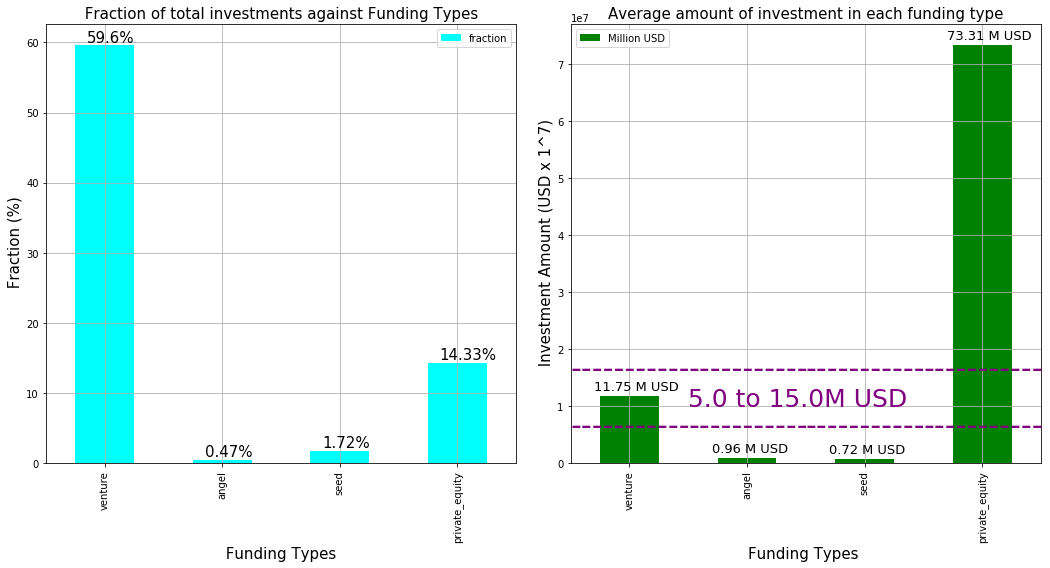

In [32]:
# Creating figure and subplots
fig1,axes1 = plt.subplots(figsize=(15,8),nrows = 1,ncols = 2)

# Plot showing the fraction(%) of total investments (globally) in angel, venture, seed, and private equity
fraction_df['fraction'].mul(100).plot(ax = axes1[0],color='aqua', kind = 'bar',grid=True,title='Fraction of total investments (globally)',legend=True) 

# creating label of values 
# here offset values are added with mathematical operators for better graphical visuals
y = list(round(fraction_df['fraction']*100,2))
for index, value in enumerate(y):
    axes1[0].text(index-0.15, value+0.5, str(value)+'%',size=15)
    
axes1[0].set_ylabel(" Fraction (%)",size=15)
axes1[0].set_xlabel(" Funding Types ",size=15)
axes1[0].set_title(" Fraction of total investments against Funding Types ",size=15)
#--------------------------------------------------------------------------------------------------------------------  
# Plot showing the average amount of investment in each funding type    
FTA_df['mean'].plot(ax=axes1[1],color='green',kind='bar', grid=True,legend=True,label='Million USD')

# creating label of values 
# here offset values are added with mathematical operators to alingn "values as text" for better graphical visuals
y1 = list(FTA_df['mean'])
for index1, value1 in enumerate(y1):
    axes1[1].text(index1-0.30,value1+1E6, str(round((value1/1E6),2))+" M USD",size=13)
    # markers for allowable range 5-15 million USD
    axes1[1].text(index1-0.50,inv_amt_range[0],str('-----------'),color='purple',size=30)
    axes1[1].text(index1-0.50,inv_amt_range[1],str('-----------'),color='purple',size=30)

# Adding a text describing the range of 5-15 million USD
axes1[1].text(0.5,(inv_amt_range[0]+inv_amt_range[1])/2,str(inv_amt_range[0]/1E6)+' to '+str(inv_amt_range[1]/1E6)+'M USD',color='purple',size=25)

axes1[1].set_ylabel(" Investment Amount (USD x 1^7)",size=15)
axes1[1].set_xlabel("Funding Types ",size=15)
axes1[1].set_title("Average amount of investment in each funding type",size=15)

fig1.tight_layout()

<H3> >> A plot showing the <font color='red'>top 9 countries </font> against the total amount of investments of funding type :<font color='blue'>Venture</font> </H3>

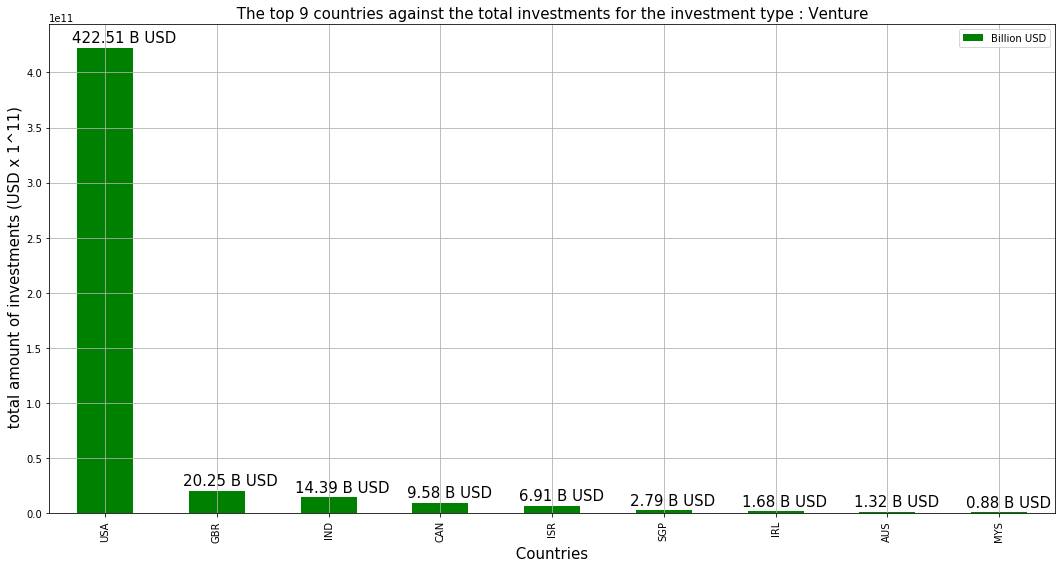

In [33]:
fig2,axes2 = plt.subplots(figsize=(15,8))

# Plotting 
top9["raised_amount_usd"].head(9).plot(ax=axes2,kind='bar', color='green',grid=True,legend=True,label='Billion USD')
top9 = top9.head(9)

# creating label of values 
# here offset values are added with mathematical operators to alingn "values as text" for better graphical visuals
y2 = list(top9['raised_amount_usd'])
for index2, value2 in enumerate(y2):
    axes2.text(index2-0.30,value2+5E9, str(round(value2/1E9,2))+" B USD",size=15)
axes2.set_ylabel(" total amount of investments (USD x 1^11)",size=15)
axes2.set_xlabel(" Countries ",size=15)
axes2.set_title(" The top 9 countries against the total investments for the investment type : Venture ",size=15)

fig2.tight_layout()

<H3> >> Creating a dataframe of the number of investments in the <font color='red'>top 3 sectors</font> of the <font color='red'>top 3 countries</font> on one chart (for the chosen investment type : <font color =' blue'> Venture </font>). </H3>

In [34]:
# Filtering the main Countries DataFrame with selected top 3 sectors
filter_D1 = D1[D1['main_sector'].isin(sectors_D1)]
filter_D2 = D2[D2['main_sector'].isin(sectors_D2)]
filter_D3 = D3[D3['main_sector'].isin(sectors_D3)]

# Creating a concated DataFrame of countries with filtered sectors
top_3C = pd.concat([filter_D1,filter_D2,filter_D3])

# Creating a final dataframe of top 3 countries with their top 3 respective sectors
final_df = pd.DataFrame({'country':top_3C.country_code,'main_sector': top_3C.main_sector,'counts': top_3C['no. of invest']})

# Dropping duplicates in final_df and keeping the last rows withing duplicates
final_df.drop_duplicates(keep="last",inplace=True)
final_df.head()

,country,main_sector,counts
2816,USA,Others,2069
4553,USA,Cleantech / Semiconductors,1737
5154,USA,Health,601
30,GBR,"News, Search and Messaging",31
136,GBR,Others,106


<H3> >> A plot showing the number of investments in the <font color='red'>top 3 sectors</font> of the <font color='red'>top 3 countries</font> on one chart (for the chosen investment type : <font color =' blue'> Venture </font>). </H3>

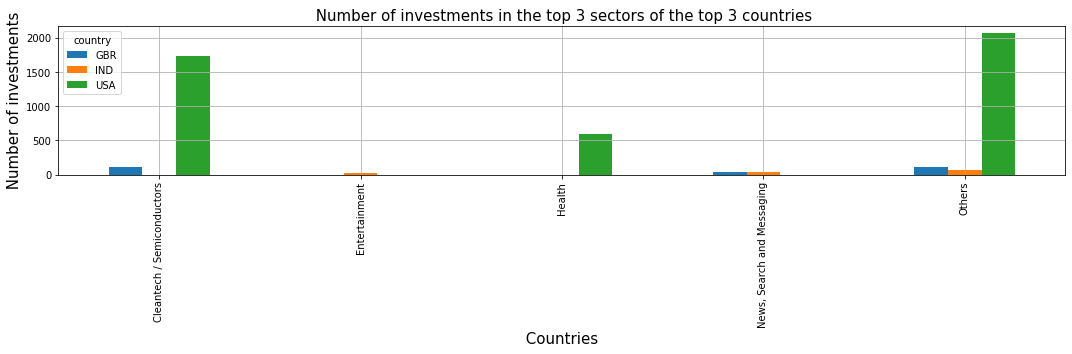

In [45]:
# Creating figure and subplots
fig3,axes3 = plt.subplots(figsize=(15,5))

# Creating pivot table and plotting it
final_df.pivot(index='main_sector', columns='country', values= 'counts').plot(kind='bar',grid = 1,ax=axes3,title =' Number of investments in the top 3 sectors of the top 3 countries')

axes3.set_ylabel(" Number of investments ",size=15)
axes3.set_xlabel(" Countries ",size=15)
axes3.set_title(" Number of investments in the top 3 sectors of the top 3 countries",size=15)

fig3.tight_layout()

<H1> ~ End of Assignment ~</H1>

***